In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

# matplotlib 한글 폰트 오류 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

## 데이터 불러오기
- 최근 3개월간 클로젯셰어 신규 구매 데이터 일부

In [321]:
df = pd.read_excel('closetDB.xlsx',encoding='ansi')

In [322]:
df.head(5)

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


## 컬럼 정의

- brandnm : 아이템 브랜드명
- goodsnm : 아이템 명
- USER : 개별 유저 식별 값
- reg_date : 개별 유저 가입일
- order_date : 아이템 주문일
- p_type : 주문 상품 종류
     - 7days (7일권) / 4days (4일권)
- sub_type : 주문 상품 카테고리 
     - BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TB – 투피스 
- app_yn : 어플리케이션 사용 여부
     - Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용


## 데이터 확인 (자료형, 결측치)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


## 결측치 처리
- 'brandnm' 결측치는 'goodsnm'을 바탕으로 클로젯셰어에서 검색 후 입력 (3가지 품목 제외)
- 'reg_date' 결측치는 USER ID가 순차적으로 입력된 것을 바탕으로 입력

In [324]:
df[df['brandnm'].isnull()]

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,NaN
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y


In [325]:
df[df['reg_date'].isnull()]

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaT,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaT,2021-01-18,7days,O,NaN
564,Gucci,leather point cross bag,a1146490,NaT,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaT,2021-02-04,4days,BA,NaN
1254,Fendi,back to school bag 1,a1149094,NaT,2021-03-12,7days,BA,Y


## 수정된 데이터 불러오기

In [326]:
ndf = pd.read_excel('과제수정DB.xlsx',encoding='utf-8')

## 'app_yu' 결측치를 'N'으로 채우기

In [327]:
ndf['app_yn'].replace(np.nan, 'N', inplace=True)

## 'brandnm' 결측치 2가지 drop

In [328]:
ndf.dropna(axis=0, inplace=True)

In [329]:
ndf.describe()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
count,1469,1469,1469,1469,1469,1469,1469,1469
unique,253,977,1232,368,90,2,6,2
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,233,23,11,44,46,892,692,1293
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


## 'p_type'(대여일수) 과 'app_yn'(앱사용여부) 별 'sub_type'(대여품목)의 분포 

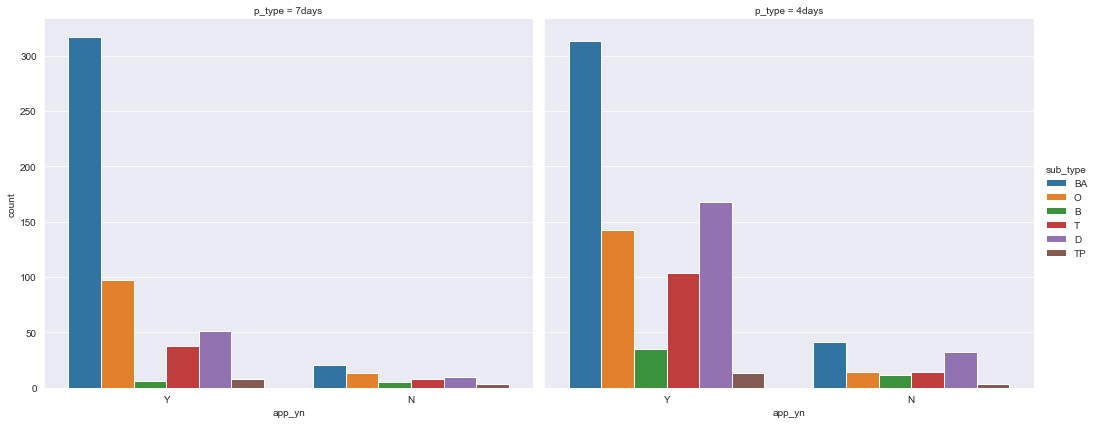

In [330]:
sns.set_style(style="darkgrid")
sns.catplot(x="app_yn", hue="sub_type", col="p_type",
            data=ndf, kind="count",
            height=6, aspect=1.2)

BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TB – 투피스
 #### 1. 7일권 이용자 보다 4일권 이용자의 수가 많다.
 #### 2. 대부분의 유저가 앱을 사용해서 물건을 대여했다.
 #### 3. 가장 많이 대여한 품목은 가방이다.
 #### 4. 눈에 띄는 차이점은 드레스는 확실히 4일권의 비중이 높음

## 가장 많이 대여한 물품
- 가방, 아우터, 드레스, 상의, 하의, 투피스 순

In [331]:
ndf['sub_type'].value_counts().to_frame()

,sub_type
BA,692
O,267
D,261
T,164
B,58
TP,27


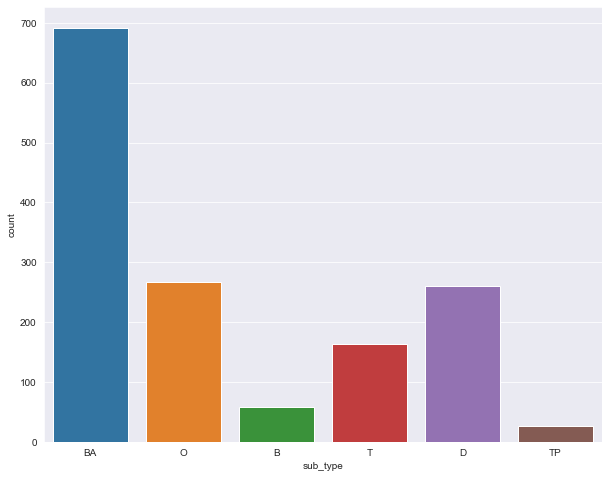

In [332]:
plt.figure(figsize=(10,8))
sns.countplot(x="sub_type", data=ndf)

## 이용권 비교
- 4days : 891
- 7days	: 577

In [333]:
ndf['p_type'].value_counts().to_frame()

,p_type
4days,892
7days,577


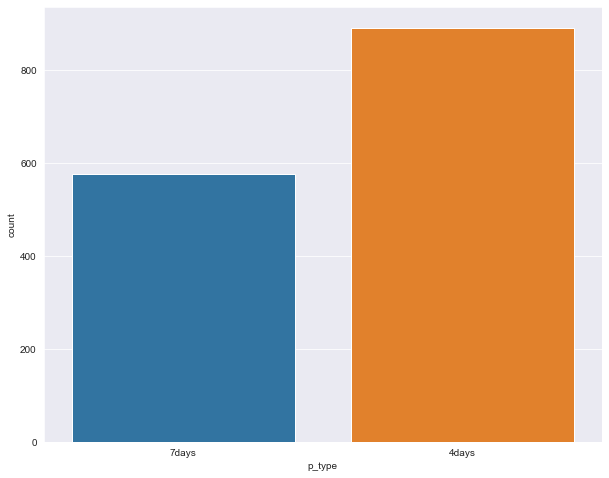

In [334]:
plt.figure(figsize=(10,8))
sns.countplot(x="p_type", data=ndf)

## 앱 사용여부 비교
- Y(사용)	: 1293
- N(사용안함)	: 175
- 대다수의 이용자들이 앱을 사용하여 품목 대여

In [335]:
ndf['app_yn'].value_counts().to_frame()

,app_yn
Y,1293
N,176


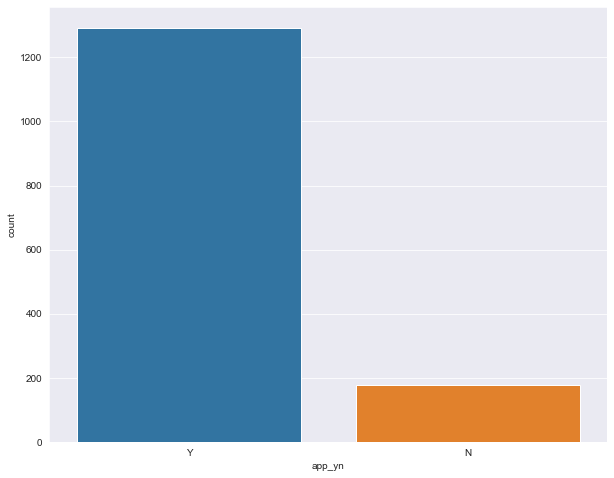

In [336]:
plt.figure(figsize=(10,8))
sns.countplot(x="app_yn", data=ndf)

## 가장 많이 대여한 Top10 브랜드
- 구찌, 샤넬, 생로랑, 루이비통, 프라다, 버버리, 입생로랑, 톰브라운, 펜디, 셀린느 순

In [337]:
brand_top10 = ndf['brandnm'].value_counts().sort_values(ascending=False).head(10).to_frame()
brand_top10

,brandnm
Gucci,233
Chanel,91
Saint Laurent,86
Louis Vuitton,79
Prada,58
Burberry,53
Yves Saint Laurent,38
Thom Browne,33
Fendi,30
Celine,28


Text(0.5, 0, '브랜드명')

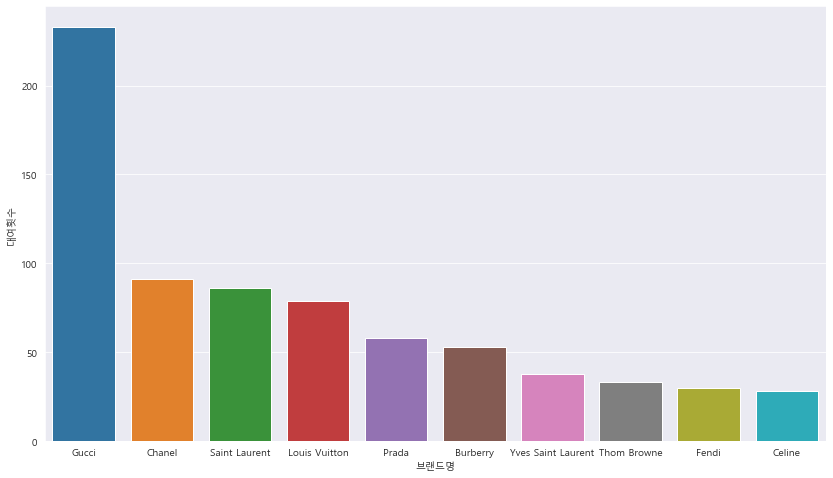

In [340]:
plt.figure(figsize=(14,8))
sns.barplot(x=brand_top10.index, y='brandnm', data=brand_top10)
plt.ylabel('대여횟수', fontsize=10)
plt.xlabel('브랜드명', fontsize=10)

## Top10 브랜드에서 가장 많이 대여한 품목 분석
- 버버리는 아우터, 톰브라운은 상의의 비중이 높고, 나머지 브랜드는 가방의 비중이 압도적으로 높음

In [341]:
brand_item = ndf.groupby(ndf['brandnm'])['sub_type'].value_counts().loc[['Gucci','Chanel','Saint Laurent','Louis Vuitton','Prada',
                                                            'Burberry','Yves Saint Laurent','Thom Browne','Fendi','Celine']].to_frame()
brand_item.columns=['count']
brand_item.reset_index(inplace=True)
brand_item

,brandnm,sub_type,count
0,Burberry,O,30
1,Burberry,BA,10
2,Burberry,T,10
3,Burberry,D,2
4,Burberry,B,1
5,Celine,BA,20
6,Celine,O,7
7,Celine,T,1
8,Chanel,BA,75
9,Chanel,O,13


Text(0.5, 0, '브랜드명')

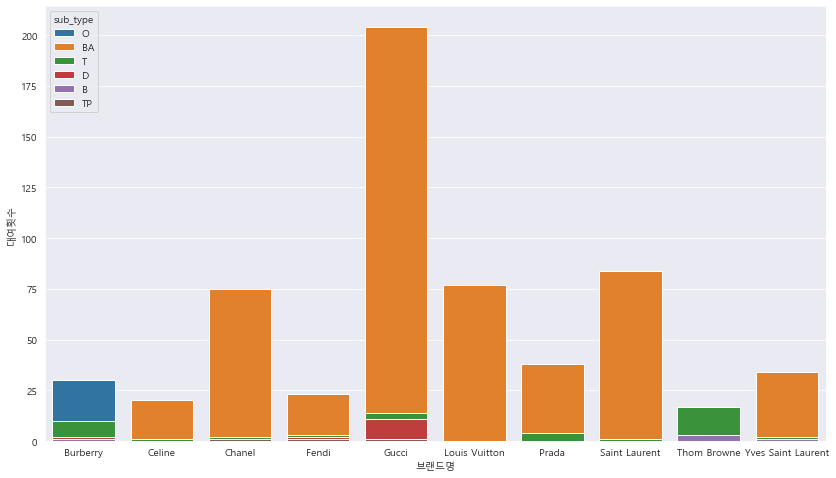

In [342]:
plt.figure(figsize=(14,8))
sns.barplot(x='brandnm', y='count', hue='sub_type', dodge=False, data=brand_item)
plt.ylabel('대여횟수', fontsize=10)
plt.xlabel('브랜드명', fontsize=10)

## 회원가입 날짜에 따른 대여 횟수
- 신규 유저일수록 대여를 더 많이 하는 것을 알 수 있음

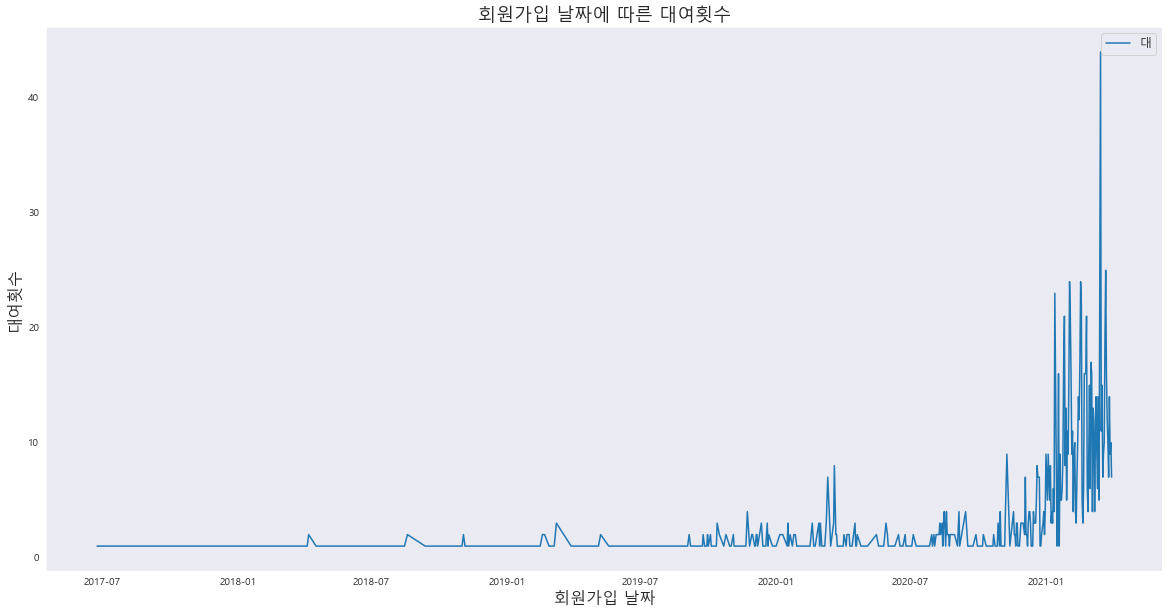

In [343]:
reg_time = ndf.groupby(ndf['reg_date'])['goodsnm'].count()
plt.figure(figsize=(20,10))
sns.lineplot(reg_time.index, reg_time.values)
plt.grid()
plt.legend('대여횟수',loc='best', fontsize=12)
plt.title('회원가입 날짜에 따른 대여횟수', fontsize=18)
plt.ylabel('대여횟수', fontsize=16)
plt.xlabel('회원가입 날짜', fontsize=16)
plt.show()

## 최근 3개월 간 대여 횟수
- 주기성이 보임

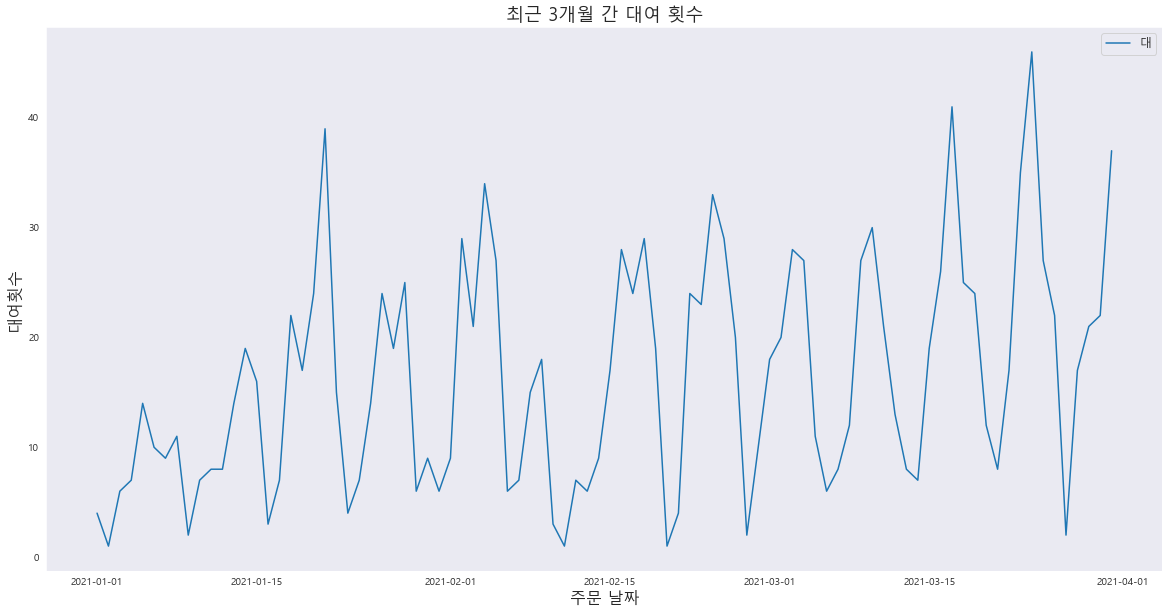

In [344]:
order_time = ndf.groupby(ndf['order_date'])['goodsnm'].count()
plt.figure(figsize=(20,10))
sns.lineplot(order_time.index, order_time.values)
plt.grid()
plt.legend('대여횟수',loc='best', fontsize=12)
plt.title('최근 3개월 간 대여 횟수', fontsize=18)
plt.ylabel('대여횟수', fontsize=16)
plt.xlabel('주문 날짜', fontsize=16)
plt.show()

## 주기성을 보기 위해 요일별 대여 횟수 살펴보기
- 월요일부터 수요일까지 증가하다가 목요일부터 감소
- 주말에는 평일보다 대여 횟수가 현저히 적음

In [345]:
ndf['order_month'] = [k for k in ndf['order_date'].dt.month]
ndf['order_day'] = [k for k in ndf['order_date'].dt.day]
ndf['order_dayofweek'] = [k for k in ndf['order_date'].dt.dayofweek]

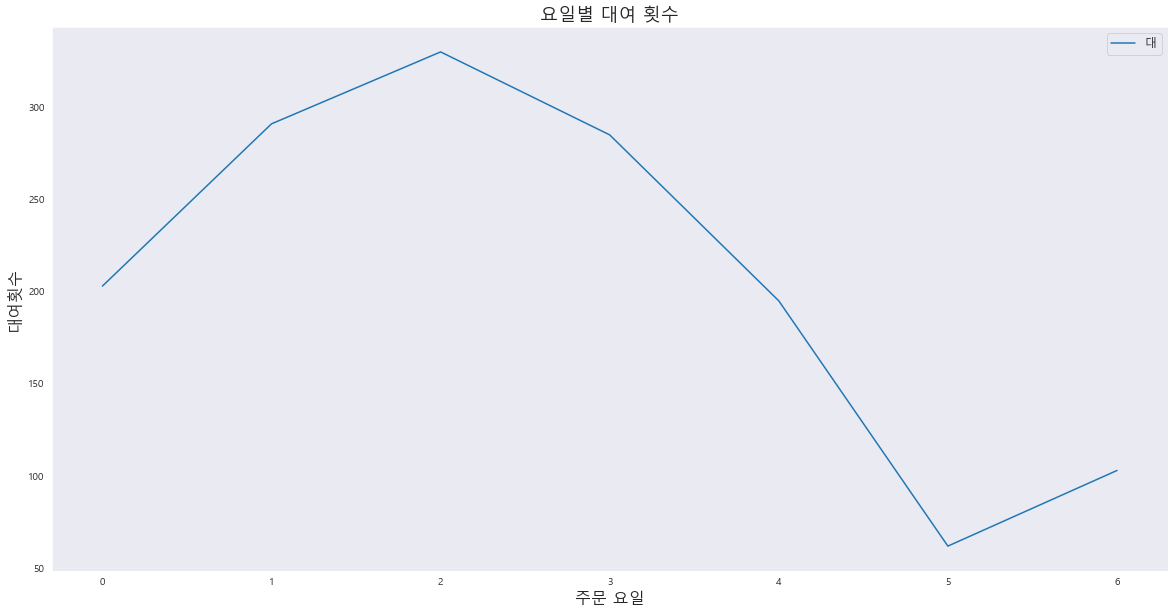

In [346]:
week_order = ndf.groupby(ndf['order_dayofweek'])['brandnm'].count()
plt.figure(figsize=(20,10))
sns.lineplot(week_order.index, week_order.values)
plt.grid()
plt.legend('대여횟수',loc='best', fontsize=12)
plt.title('요일별 대여 횟수', fontsize=18)
plt.ylabel('대여횟수', fontsize=16)
plt.xlabel('주문 요일', fontsize=16)
plt.show()

* 요일 : {월:0, 화:1, 수:2, 목:3, 금:4, 토:5, 일:6}

## 월별 대여 횟수 살펴보기
- 1월부터 3월까지 대여 횟수가 꾸준히 증가

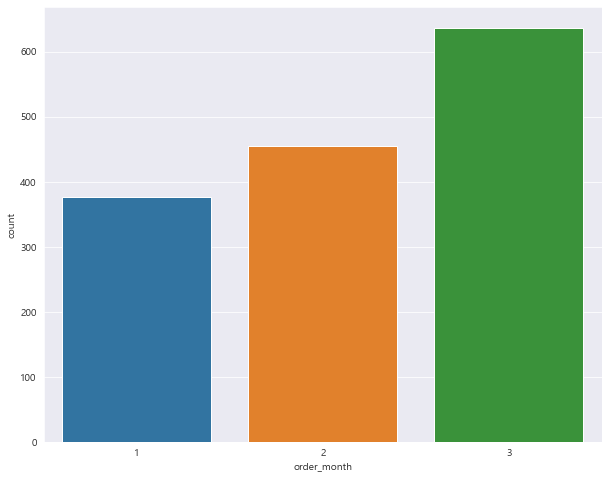

In [347]:
plt.figure(figsize=(10,8))
sns.countplot(x="order_month", data=ndf)

## 일별 대여 횟수 살펴보기

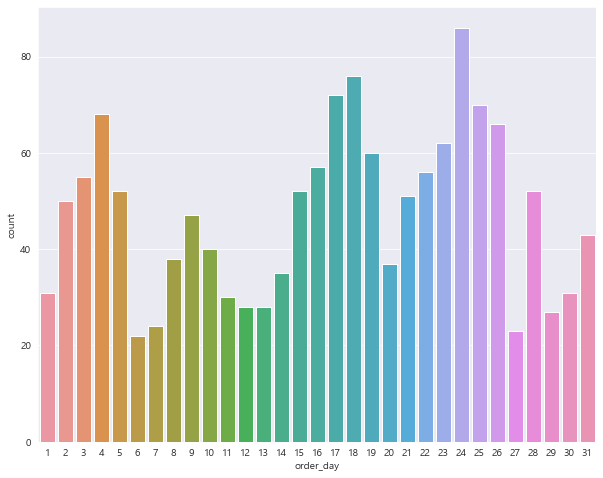

In [348]:
plt.figure(figsize=(10,8))
sns.countplot(x="order_day", data=ndf)

## 주문 수 Top10 유저 분석 
- 주문 수가 많은 회원들을 추출했더니 10명 전부 하루에 다 주문한 것을 알 수 있음 

In [349]:
user_top10 = ndf.groupby(['USER'])['goodsnm'].count().sort_values(ascending=False).head(10).to_frame()
user_top10

,goodsnm
USER,
a1149461,11
a1149583,10
a1142677,9
a189404,7
a1143701,7
a187924,6
a1129550,6
a1149542,6
a1140758,5


Text(0.5, 0, '유저')

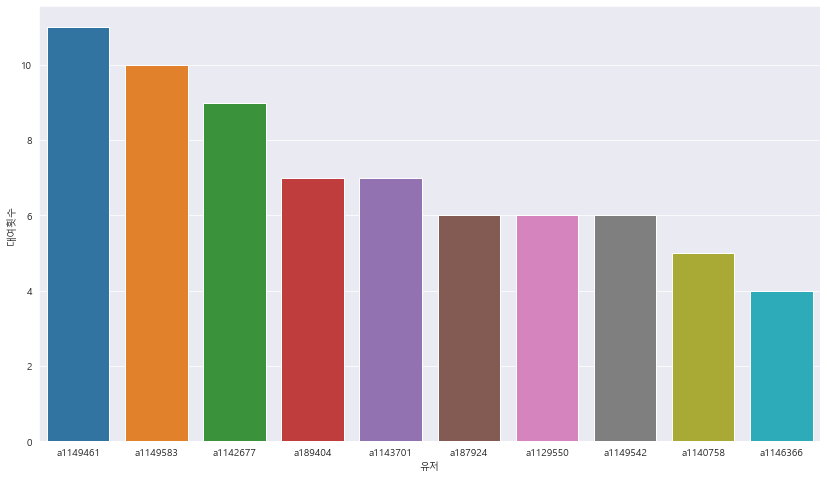

In [350]:
plt.figure(figsize=(14,8))
sns.barplot(x=user_top10.index, y='goodsnm', data=user_top10)
plt.ylabel('대여횟수', fontsize=10)
plt.xlabel('유저', fontsize=10)